In [36]:
import pandas as pd
import numpy as np
import csv
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator

1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [37]:
# ex 1.1

out_file_name = "data/data_int.txt"

mylist = [i for i in range(21)]

with open(out_file_name, 'w') as outfile:
    for i in mylist:
        outfile.write(str(i) + '\n')

!cat data/data_int.txt

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [38]:
# ex 1.2

out_file_name = "data/data_float.txt"

myarr = np.random.random((5,5))

np.savetxt(out_file_name, myarr, fmt='%.5f')

!cat data/data_float.txt

0.82113 0.12180 0.53390 0.35531 0.82881
0.57682 0.51536 0.76768 0.94670 0.92630
0.00408 0.37743 0.01218 0.84628 0.59445
0.64378 0.38188 0.92925 0.62221 0.04592
0.61781 0.77030 0.33568 0.10586 0.70764


In [39]:
# ex 1.3

with open('data/data_float.csv', 'w') as outfile: 
    with open('data/data_float.txt', 'r') as infile:
        for line in infile:
            outfile.write(line.replace(' ', ', '))

!cat data/data_float.csv

0.82113, 0.12180, 0.53390, 0.35531, 0.82881
0.57682, 0.51536, 0.76768, 0.94670, 0.92630
0.00408, 0.37743, 0.01218, 0.84628, 0.59445
0.64378, 0.38188, 0.92925, 0.62221, 0.04592
0.61781, 0.77030, 0.33568, 0.10586, 0.70764


2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [40]:
# ex 2

import json

#!wget https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json -P data/

data = json.load(open('data/user_data.json'))
filtered_data = [x for x in data if x['CreditCardType'] == 'American Express']
df = pd.DataFrame(filtered_data)

df.to_csv('data/user_data.csv', index = None)

df

,ID,JobTitle,EmailAddress,FirstNameLastName,CreditCard,CreditCardType
0,2,Investment Advisor,Clint_Thorpe5003@bulaffy.com,Clint Thorpe,7083-8766-0251-2345,American Express
1,12,Retail Trainee,Phillip_Carpenter9505@famism.biz,Phillip Carpenter,3657-0088-0820-5247,American Express
2,28,Project Manager,Russel_Graves1378@extex.org,Russel Graves,6718-4818-8011-6024,American Express
3,39,Stockbroker,Leanne_Newton1268@typill.biz,Leanne Newton,5438-0816-4166-4847,American Express
4,57,Budget Analyst,Tony_Giles1960@iatim.tech,Tony Giles,8130-3425-7573-7745,American Express
5,62,CNC Operator,Owen_Allcott5125@bauros.biz,Owen Allcott,4156-0107-7210-2630,American Express
6,68,Project Manager,Liam_Lynn3280@kideod.biz,Liam Lynn,7152-3247-6053-2233,American Express
7,74,Dentist,Regina_Woodcock5820@yahoo.com,Regina Woodcock,0208-1753-3870-8002,American Express
8,81,HR Specialist,Carter_Wallace9614@atink.com,Carter Wallace,4256-7201-6717-4322,American Express
9,92,Staffing Consultant,Maia_Stark2797@jiman.org,Maia Stark,3851-1403-1734-6321,American Express


3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [41]:
# ex 3.1

#!wget 'https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv' -P data/

df1 = pd.read_csv("data/mushrooms_categorized.csv")
df1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [42]:
# ex 3.2

df1_grouped = df1.groupby('class')
df1_grouped.mean()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
0,3.266160,1.615970,4.581749,0.653992,4.334601,0.954373,0.285171,0.068441,6.622624,0.615970,...,1.798479,6.098859,6.064639,0.0,1.931559,1.125475,3.007605,3.201521,3.283270,1.148289
1,3.436159,2.055158,4.421859,0.159346,3.940756,0.995403,0.028601,0.567926,2.863636,0.514811,...,1.394280,5.512768,5.504597,0.0,2.002043,1.009193,1.522983,4.021450,4.031665,1.895812


In [43]:
# ex 3.3

df1.to_json('data/mushrooms_categorized.json', orient = 'columns')

4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [44]:
# ex 4

#!wget https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat -P data/

with open('data/credit_card.dat', 'rb') as infile:
    n_char = 6
    number = ''
    for line in infile:
        for i in range(0, len(line) - 4, n_char):
            number += chr(int(line[i:i+6], 2))
    print(number)

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117
8140 1210 6352 2845
5764 1133 7301 7100
6456 1737 4126 6726
1228 8631 7382 0000
7051 0160 5374 3166
0618 3587 1630 6376
1545 5454 7444 5636
6735 3116 3202 6834
7287 5011 1547 8413
7033 2607 3328 4200
2568 5244 1874 5024
1684 2253 7570 7118
0672 2576 0575 6631
6332 8353 8787 1340
1813 3361 1175 4211
2477 6450 8840 2368
5512 3505 2563 1326
3083 7882 0621 0025
4521 5148 8045 0334
7563 3654 8713 5787
8324 2664 0476 5561
0565 2504 7168 3510
5107 5507 1767 0738
2462 1821 2448 1443
2788 0638 6861 6554
5851 5873 5474 0547
0670 1004 4013 2655
5874 5506 3048 0806
2805 5401 8462 1260
5083 8406 6310 1862
1076 1445 3013 2266
8440 4804 4844 5277
4758 6141 0686 1387
7586 0675 0315 2568
2544 1258 7432 5165
3474 5023 4434 5626
1410 0270 0434 5086
7315 4446 1104 4215
0224 7742 8300 0266
0170 2700 3145 0640
2006 2437 8054 1600
8142 4055 1776 0026
3026 7380 1241 1084


5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

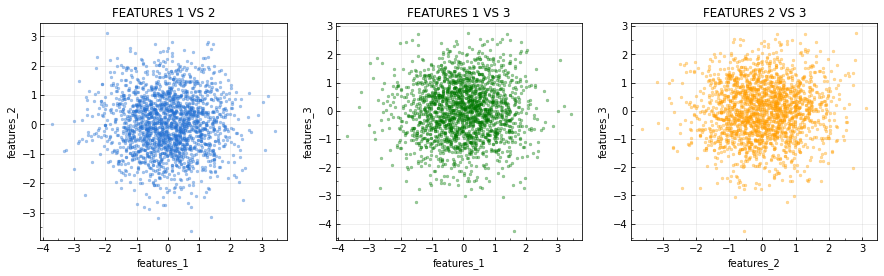

In [45]:
# ex 5

#!wget 'https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv' -P data/

df = pd.read_csv('data/regression_generated.csv')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

ax1.scatter(x=df['features_1'], y=df['features_2'], marker='.', color='#1874cd', alpha=0.4, edgecolor='royalblue', lw=0.3)
ax1.set_title('FEATURES 1 VS 2')
ax1.set_xlabel('features_1')
ax1.set_ylabel('features_2')
ax1.tick_params(which='both', direction='in')
ax1.grid(which='major', axis='both', alpha=0.25)
ax1.set_axisbelow(True)
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax2.scatter(x=df['features_1'], y=df['features_3'], marker='.', color='green', alpha=0.4, edgecolor='darkgreen', lw=0.3)
ax2.set_title('FEATURES 1 VS 3')
ax2.set_xlabel('features_1')
ax2.set_ylabel('features_3')
ax2.tick_params(which='both', direction='in')
ax2.grid(which='major', axis='both', alpha=0.25)
ax2.set_axisbelow(True)
ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))

ax3.scatter(x=df['features_2'], y=df['features_3'], marker='.', color='orange', alpha=0.4, edgecolor='darkorange', lw=0.3)
ax3.set_title('FEATURES 2 VS 3')
ax3.set_xlabel('features_2')
ax3.set_ylabel('features_3')
ax3.tick_params(which='both', direction='in')
ax3.grid(which='major', axis='both', alpha=0.25)
ax3.set_axisbelow(True)
ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(2))
